In [90]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
from haversine import haversine, Unit
display.max_columns = 1000



In [8]:
# Load in 2 weeks of social distancing metrics data
all_sd_metrics = pd.DataFrame()
file_names = [
'2019-10-25-social-distancing.csv.gz',
'2019-10-26-social-distancing.csv.gz',
'2019-10-27-social-distancing.csv.gz',
'2019-10-28-social-distancing.csv.gz',
'2019-10-29-social-distancing.csv.gz',
'2019-10-30-social-distancing.csv.gz',
'2019-10-31-social-distancing.csv.gz',
'2019-11-01-social-distancing.csv.gz',
'2020-10-25-social-distancing.csv.gz',
'2020-10-26-social-distancing.csv.gz',
'2020-10-27-social-distancing.csv.gz',
'2020-10-28-social-distancing.csv.gz',
'2020-10-29-social-distancing.csv.gz',
'2020-10-30-social-distancing.csv.gz',
'2020-10-31-social-distancing.csv.gz',
'2020-11-01-social-distancing.csv.gz']

for file in file_names:
    with gzip.open(file) as f:
        print(file)
        data = pd.read_csv(f)
        all_sd_metrics = all_sd_metrics.append(data)
    

2019-10-25-social-distancing.csv.gz
2019-10-26-social-distancing.csv.gz
2019-10-27-social-distancing.csv.gz
2019-10-28-social-distancing.csv.gz
2019-10-29-social-distancing.csv.gz
2019-10-30-social-distancing.csv.gz
2019-10-31-social-distancing.csv.gz
2019-11-01-social-distancing.csv.gz
2020-10-25-social-distancing.csv.gz
2020-10-26-social-distancing.csv.gz
2020-10-27-social-distancing.csv.gz
2020-10-28-social-distancing.csv.gz
2020-10-29-social-distancing.csv.gz
2020-10-30-social-distancing.csv.gz
2020-10-31-social-distancing.csv.gz
2020-11-01-social-distancing.csv.gz


In [27]:
all_sd_metrics['date_range_start'] = pd.to_datetime(all_sd_metrics['date_range_start'],utc = True)
all_sd_metrics['year'] = all_sd_metrics['date_range_start'].dt.year

In [28]:
all_sd_metrics



,origin_census_block_group,date_range_start,date_range_end,device_count,distance_traveled_from_home,bucketed_distance_traveled,median_dwell_at_bucketed_distance_traveled,completely_home_device_count,median_home_dwell_time,bucketed_home_dwell_time,...,delivery_behavior_devices,median_non_home_dwell_time,candidate_device_count,bucketed_away_from_home_time,median_percentage_time_home,bucketed_percentage_time_home,mean_home_dwell_time,mean_non_home_dwell_time,mean_distance_traveled_from_home,year
0,10330210004,2019-10-25 05:00:00+00:00,2019-10-26T00:00:00-05:00,85,3365,"{""16001-50000"":35,""0"":19,"">50000"":4,""2001-8000...","{""16001-50000"":31,"">50000"":18,""<1000"":130,""200...",18,721,"{""721-1080"":24,""361-720"":19,""61-360"":9,""<60"":1...",...,7,274,173,"{""21-45"":1,""481-540"":3,""541-600"":5,""721-840"":4...",70,"{""0-25"":13,""76-100"":34,""51-75"":29,""26-50"":8}",691,318,9062,2019
1,10730049022,2019-10-25 05:00:00+00:00,2019-10-26T00:00:00-05:00,114,1901,"{""16001-50000"":2,""0"":38,"">50000"":19,""2001-8000...","{""16001-50000"":125,"">50000"":21,""<1000"":63,""200...",39,217,"{""721-1080"":13,""361-720"":14,""61-360"":24,""<60"":...",...,1,46,1716,"{""21-45"":5,""481-540"":4,""541-600"":2,""46-60"":2,""...",64,"{""0-25"":38,""76-100"":51,""51-75"":11,""26-50"":10}",438,241,18816,2019
2,11210118001,2019-10-25 05:00:00+00:00,2019-10-26T00:00:00-05:00,58,1059,"{""16001-50000"":1,""0"":20,"">50000"":6,""2001-8000""...","{""16001-50000"":134,"">50000"":90,""<1000"":60,""200...",21,761,"{""721-1080"":12,""361-720"":10,""61-360"":2,""<60"":1...",...,3,74,204,"{""21-45"":1,""481-540"":1,""541-600"":4,""46-60"":2,""...",86,"{""0-25"":13,""76-100"":33,""51-75"":4,""26-50"":6}",702,297,19970,2019
3,11250106021,2019-10-25 05:00:00+00:00,2019-10-26T00:00:00-05:00,359,9279,"{""16001-50000"":126,""0"":69,"">50000"":24,""2001-80...","{""16001-50000"":64,"">50000"":31,""<1000"":65,""2001...",70,668,"{""721-1080"":88,""361-720"":93,""61-360"":37,""<60"":...",...,18,331,1929,"{""21-45"":27,""481-540"":23,""541-600"":21,""46-60"":...",67,"{""0-25"":69,""76-100"":148,""51-75"":93,""26-50"":46}",651,367,18355,2019
4,21880002003,2019-10-25 08:00:00+00:00,2019-10-26T00:00:00-08:00,20,144,"{""1-1000"":7,"">50000"":1,""0"":1}","{"">50000"":472,""<1000"":71}",4,782,"{""721-1080"":4,"">1080"":2,""<60"":4,""61-360"":2}",...,1,127,35,"{""21-45"":3,""481-540"":1,""301-360"":1,""<20"":6,""61...",73,"{""0-25"":1,""76-100"":5,""51-75"":4,""26-50"":1}",633,189,199,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219405,550590013003,2020-11-01 05:00:00+00:00,2020-11-02T00:00:00-06:00,58,2108,"{""16001-50000"":3,""0"":14,"">50000"":3,""2001-8000""...","{""16001-50000"":75,"">50000"":19,""<1000"":28,""2001...",16,870,"{""721-1080"":7,""361-720"":4,""61-360"":3,""<60"":16,...",...,2,74,112,"{""21-45"":6,""481-540"":2,""541-600"":1,"">1440"":1,""...",82,"{""0-25"":18,""76-100"":31,""51-75"":7,""26-50"":2}",772,232,10791,2020
219406,550590020001,2020-11-01 05:00:00+00:00,2020-11-02T00:00:00-06:00,49,1662,"{""16001-50000"":1,""0"":12,"">50000"":5,""2001-8000""...","{""16001-50000"":48,"">50000"":205,""<1000"":102,""20...",16,872,"{""721-1080"":3,""361-720"":5,""61-360"":3,""<60"":18,...",...,2,51,97,"{""21-45"":1,"">1440"":1,""46-60"":3,""<20"":19,""61-12...",93,"{""0-25"":15,""76-100"":32}",748,244,1979,2020
219407,550679605002,2020-11-01 05:00:00+00:00,2020-11-02T00:00:00-06:00,32,89,"{""16001-50000"":8,""0"":5,"">50000"":6,""2001-8000"":...","{""16001-50000"":30,"">50000"":493,""<1000"":64,""200...",8,481,"{""721-1080"":2,""361-720"":1,""61-360"":7,""<60"":11,...",...,1,43,71,"{""21-45"":2,""481-540"":2,""46-60"":1,""<20"":12,""61-...",87,"{""0-25"":7,""76-100"":22,""51-75"":1,""26-50"":2}",643,323,5382,2020
219408,550730019007,2020-11-01 05:00:00+00:00,2020-11-02T00:00:00-06:00,50,2371,"{""16001-50000"":3,""0"":17,"">50000"":10,""2001-8000...","{""16001-50000"":50,"">50000"":103,""<1000"":235,""20...",19,8

In [56]:
### Load in geographic lat-long data per CBG
centers = pd.read_csv('cbg_geos_centers.csv')
all_sd_metrics_geo = pd.merge(all_sd_metrics, centers[['CensusBlockGroup','lat','long']],left_on = 'origin_census_block_group', right_on = 'CensusBlockGroup', how = 'left')

In [57]:
### Load in university data
college_list = pd.read_csv('college_list.csv')
college_list

,UnitID,Institution Name,ZIP code (HD2019),County name (HD2019),Fips County code (HD2019),Longitude,Latitude
0,177834,A T Still University of Health Sciences,63501,Adair County,29001,-92.589183,40.193648
1,180203,Aaniiih Nakoda College,59526,Blaine County,30005,-108.757816,48.484196
2,491464,ABC Adult School,90703-2801,Los Angeles County,6037,-118.070114,33.878179
3,459523,ABC Beauty Academy,75081,Dallas County,48113,-96.685333,32.931698
4,485500,ABCO Technology,90304-1551,Los Angeles County,6037,-118.369774,33.932121
...,...,...,...,...,...,...,...
6522,413820,Yukon Beauty College Inc,73099,Canadian County,40017,-97.746680,35.508293
6523,451237,Z Hair Academy,66223,Johnson County,20091,-94.666351,38.867002
6524,204255,Zane State College,43701-2626,Muskingum County,39119,-82.031198,39.962410
6525,458575,Zaytuna College,94709,Alameda County,6001,-122.260927,37.877201


In [111]:
#For each university select all CBG within 2 mile radius
results = []
for i in range(0,len(college_list)):
    if i % 100 == 0:
        print(i)
    temp = college_list.iloc[i]
    lat = temp['Latitude']
    long = temp['Longitude']
    try:
        lat_ul = lat + 0.3
        lat_ll = lat - 0.3
        long_ul = long + 0.3
        long_ll = long - 0.3
        cond = (all_sd_metrics_geo['lat'] < lat_ul) & (all_sd_metrics_geo['lat'] > lat_ll) & (all_sd_metrics_geo['long'] < long_ul) & (all_sd_metrics_geo['long'] > long_ll)
        sdm = all_sd_metrics_geo[cond]
        sdm['dist'] =  [haversine(x,(lat,long),unit=Unit.MILES) for x in list(zip(sdm.lat, sdm.long))]
        sdm = sdm[sdm['dist'] <= 2]
        device_count = sdm.groupby('date_range_start').device_count.sum().reset_index()
        device_count['year'] =  device_count['date_range_start'].dt.year
        device_count = device_count.groupby('year').device_count.mean()
        results.append( [temp['UnitID'],temp['Institution Name'], device_count[2019],device_count[2020]] )
    except:
        results.append([temp['UnitID'],temp['Institution Name'], None,None])
        

0


<ipython-input-111-daa33df7279b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdm['dist'] =  [haversine(x,(lat,long),unit=Unit.MILES) for x in list(zip(sdm.lat, sdm.long))]


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500


In [112]:
college_nbhd_data = pd.DataFrame(results,columns = ['unitid','inst_name','device_counts_2019','device_count_2020'])
college_nbhd_data = college_nbhd_data.dropna(subset = ['device_count_2020'])
college_nbhd_data['pct_decrease_offcampus'] = -(college_nbhd_data['device_count_2020'] - college_nbhd_data['device_counts_2019'])/college_nbhd_data['device_counts_2019']

In [113]:
college_nbhd_data[college_nbhd_data['inst_name']=='Cornell University']

,unitid,inst_name,device_counts_2019,device_count_2020,pct_decrease_offcampus
1445,190415,Cornell University,1813.625,1248.5,0.3116


Text(0.5, 0, 'PCT Decrease')

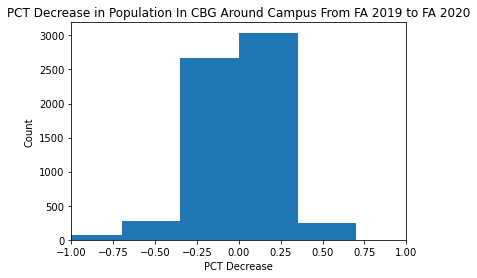

In [114]:
plt.hist(college_nbhd_data['pct_decrease_offcampus'])
plt.xlim((-1,1))
plt.title('PCT Decrease in Population In CBG Around Campus From FA 2019 to FA 2020')
plt.ylabel('Count')
plt.xlabel('PCT Decrease')

In [116]:
college_nbhd_data[college_nbhd_data['inst_name']=='Michigan State University']

,unitid,inst_name,device_counts_2019,device_count_2020,pct_decrease_offcampus
3367,171100,Michigan State University,3196.625,2290.25,0.283541


In [117]:
college_nbhd_data[college_nbhd_data['inst_name']=='Cornell University']

,unitid,inst_name,device_counts_2019,device_count_2020,pct_decrease_offcampus
1445,190415,Cornell University,1813.625,1248.5,0.3116


In [118]:
college_nbhd_data.to_csv('college_cbg_device_counts.csv')